# Lab | Data Aggregation and Filtering

Objective: Use Python programming techniques to filter and order data subsets, group data by one or more variables, and use aggregation functions to obtain insights, and derive meaningful conclusions from the data.

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

Start by reading the dataset, standardizing column names, dealing with null values and creating the month column. You can do so by using the functions you developed in previous labs, or by reading the clean dataset you saved in the last lab `data structuring and combining`.

Then, answer the following questions:

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the median customer lifetime value by education level and gender.

5. Find the maximum, minimum, and average number of open complaints by state and policy type.

6. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [24]:
import matplotlib
import pandas as pd
df = pd.read_csv("/Users/lenovo1/Downloads/Lab-data-transformation/marketing_customer_analysis.csv")

In [25]:
def lower_case_column_names(data):
    data.columns = [column.lower() for column in data.columns]
    return data


In [26]:
lower_case_column_names(df)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [27]:
df_status = df.groupby(['state','education'])['total claim amount'].mean()
df_status


state       education           
Arizona     Bachelor                416.507744
            College                 427.614383
            Doctor                  339.460417
            High School or Below    472.089981
            Master                  323.664450
California  Bachelor                427.631689
            College                 429.643467
            Doctor                  357.366655
            High School or Below    488.113002
            Master                  365.301371
Nevada      Bachelor                435.799692
            College                 408.643148
            Doctor                  283.272746
            High School or Below    524.067973
            Master                  313.173857
Oregon      Bachelor                429.153626
            College                 423.319644
            Doctor                  335.839879
            High School or Below    482.221101
            Master                  358.119735
Washington  Bachelor       

In [28]:
df.state.fillna(method = 'ffill', inplace = True)#forward fill

In [29]:
df.response.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [31]:
df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [32]:

# Convert 'effective to date' column to datetime
df['effective to date'] = pd.to_datetime(df['effective to date'], errors = 'coerce')

# Check the description of the 'effective to date' column
print(df['effective to date'].describe(datetime_is_numeric=True))


count                             9134
mean     2011-01-29 20:06:21.519597056
min                2011-01-01 00:00:00
25%                2011-01-15 00:00:00
50%                2011-01-29 00:00:00
75%                2011-02-13 00:00:00
max                2011-02-28 00:00:00
Name: effective to date, dtype: object


In [33]:
# Extract the month value and create a new 'month' column
df['new month'] = df['effective to date'].dt.month

# Fill NaN values in 'month' column with the original values
df['new month'] = df['new month'].fillna(df['effective to date'])

# Print the updated DataFrame
print(df)


     customer       state  customer lifetime value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective to date employmentstatus gender  income  ...  \
0     Bachelor        2011-02-24         Employed 

In [34]:
df['new month'] = df['new month'].replace('1','January')
df['new month'] = df['new month'].replace('2', 'February')

In [35]:
# Define a dictionary of replacements
month_replacements = {'1': 'January', '2': 'February'}

# Use fillna with the dictionary of replacements
df['new month'] = df['new month'].fillna(month_replacements)


In [36]:
df['effective to date'].describe() #change dtype to date

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_75801/2220391237.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['effective to date'].describe() #change dtype to date


count                    9134
unique                     59
top       2011-01-10 00:00:00
freq                      195
first     2011-01-01 00:00:00
last      2011-02-28 00:00:00
Name: effective to date, dtype: object

In [37]:
df.employmentstatus.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: employmentstatus
Non-Null Count  Dtype 
--------------  ----- 
9134 non-null   object
dtypes: object(1)
memory usage: 71.5+ KB


In [38]:
df.gender.describe()

count     9134
unique       2
top          F
freq      4658
Name: gender, dtype: object

In [39]:
df['number of open complaints'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: number of open complaints
Non-Null Count  Dtype
--------------  -----
9134 non-null   int64
dtypes: int64(1)
memory usage: 71.5 KB


In [40]:
df['months since last claim'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: months since last claim
Non-Null Count  Dtype
--------------  -----
9134 non-null   int64
dtypes: int64(1)
memory usage: 71.5 KB


In [41]:
df['renew offer type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [42]:
df.isnull().any()

customer                         False
state                            False
customer lifetime value          False
response                         False
coverage                         False
education                        False
effective to date                False
employmentstatus                 False
gender                           False
income                           False
location code                    False
marital status                   False
monthly premium auto             False
months since last claim          False
months since policy inception    False
number of open complaints        False
number of policies               False
policy type                      False
policy                           False
renew offer type                 False
sales channel                    False
total claim amount               False
vehicle class                    False
vehicle size                     False
new month                        False
dtype: bool

In [43]:
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,new month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [44]:
df['effective to date'] = pd.to_datetime(df['effective to date'], format='%m/%d/%y')



In [45]:
df['months since last claim'] = df['months since last claim'].fillna(df['months since last claim'].mean())


In [46]:
df['months since last claim'] = df['months since last claim'].astype(int)
df['month'] = pd.to_datetime(df['months since last claim'], format='%m', errors='coerce').dt.month


In [47]:
df['month'].mean().astype(int)

6

In [48]:
df['month'] = df['month'].fillna(df['month'].mean())

Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [49]:
new_df = df[(df['total claim amount'] > 1000) & (df['response'] == 'Yes')]
new_df.reset_index(drop=True, inplace=True)
new_df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,new month,month
0,JC11405,Oregon,10963.957230,Yes,Premium,High School or Below,2011-02-08,Employed,M,55687,...,1,Personal Auto,Personal L3,Offer1,Agent,1324.800000,Luxury SUV,Medsize,2,6.215769
1,UY18770,California,10179.717040,Yes,Premium,Bachelor,2011-01-05,Retired,F,14290,...,1,Personal Auto,Personal L3,Offer1,Agent,1300.800000,Luxury SUV,Medsize,1,6.215769
2,QW47320,California,10179.717040,Yes,Premium,Bachelor,2011-01-05,Retired,F,14290,...,1,Personal Auto,Personal L1,Offer1,Agent,1300.800000,Luxury SUV,Medsize,1,6.215769
3,PN98247,California,7840.165778,Yes,Extended,College,2011-01-14,Employed,M,58414,...,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Luxury SUV,Small,1,7.000000
4,TC88986,Oregon,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,1,Special Auto,Special L1,Offer2,Web,1027.000029,SUV,Medsize,1,6.215769
5,UH35128,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,2,8.000000
6,DT77901,Oregon,10179.717040,Yes,Premium,Bachelor,2011-01-05,Retired,F,14290,...,1,Personal Auto,Personal L3,Offer1,Agent,1300.800000,Luxury SUV,Medsize,1,6.215769
7,VL84149,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,2,Corporate Auto,Corporate L2,Offer1,Branch,1027.200000,Luxury Car,Small,2,8.000000
8,UP29839,Nevada,19160.989940,Yes,Extended,Master,2011-02-20,Employed,F,22705,...,7,Personal Auto,Personal L1,Offer2,Agent,1294.700423,Luxury SUV,Medsize,2,6.215769
9,CK39096,Oregon,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,1,Personal Auto,Personal L3,Offer2,Web,1027.000029,SUV,Medsize,1,6.215769


In [50]:
df_tcapol = df[df['response'] == 'Yes']
df_tcapol = df_tcapol.groupby(['policy type','gender'])['total claim amount'].mean()
df_tcapol


policy type     gender
Corporate Auto  F         431.480117
                M         412.756888
Personal Auto   F         454.089997
                M         453.603715
Special Auto    F         455.648867
                M         414.799291
Name: total claim amount, dtype: float64

In [51]:
df_custate = df.groupby('state').size()

df_polstate = df_custate[df_custate > 500]
df_polstate

state
Arizona       1703
California    3150
Nevada         882
Oregon        2601
Washington     798
dtype: int64

In [52]:
median_clv = df.groupby(['education', 'gender'])['customer lifetime value'].median()
median_clv


education             gender
Bachelor              F         5678.050167
                      M         5555.830205
College               F         5621.789489
                      M         5989.773931
Doctor                F         5332.462694
                      M         5620.587184
High School or Below  F         6044.020038
                      M         6176.700392
Master                F         5801.128252
                      M         5617.956917
Name: customer lifetime value, dtype: float64

Find the median customer lifetime value by education level and gender.

In [53]:
median_clv = df.groupby(['education','gender'],as_index=False)['customer lifetime value'].median()
median_clv

,education,gender,customer lifetime value
0,Bachelor,F,5678.050167
1,Bachelor,M,5555.830205
2,College,F,5621.789489
3,College,M,5989.773931
4,Doctor,F,5332.462694
5,Doctor,M,5620.587184
6,High School or Below,F,6044.020038
7,High School or Below,M,6176.700392
8,Master,F,5801.128252
9,Master,M,5617.956917


Find the maximum, minimum, and average number of open complaints by state and policy type.

In [54]:
complaint_stats = df.groupby(['state', 'policy type'],as_index=False)['number of open complaints'].agg(['max', 'min', 'mean'])
complaint_stats

max  min      mean
state      policy type                       
Arizona    Corporate Auto    5    0  0.372372
           Personal Auto     5    0  0.393658
           Special Auto      3    0  0.259740
California Corporate Auto    4    0  0.315291
           Personal Auto     5    0  0.400348
           Special Auto      5    0  0.460177
Nevada     Corporate Auto    5    0  0.451282
           Personal Auto     5    0  0.412577
           Special Auto      5    0  0.600000
Oregon     Corporate Auto    4    0  0.335185
           Personal Auto     5    0  0.373065
           Special Auto      5    0  0.341463
Washington Corporate Auto    5    0  0.490683
           Personal Auto     5    0  0.385502
           Special Auto      4    0  0.533333

In [55]:
df_max = df.groupby(['state', 'policy type'])['number of open complaints'].max()
df_min = df.groupby(['state', 'policy type'])['number of open complaints'].min()
df_mean = df.groupby(['state', 'policy type'])['number of open complaints'].mean()
print(df_max)
print(df_min)
print(df_mean)
# also possible would be .agg(['max','min','mean'])

state       policy type   
Arizona     Corporate Auto    5
            Personal Auto     5
            Special Auto      3
California  Corporate Auto    4
            Personal Auto     5
            Special Auto      5
Nevada      Corporate Auto    5
            Personal Auto     5
            Special Auto      5
Oregon      Corporate Auto    4
            Personal Auto     5
            Special Auto      5
Washington  Corporate Auto    5
            Personal Auto     5
            Special Auto      4
Name: number of open complaints, dtype: int64
state       policy type   
Arizona     Corporate Auto    0
            Personal Auto     0
            Special Auto      0
California  Corporate Auto    0
            Personal Auto     0
            Special Auto      0
Nevada      Corporate Auto    0
            Personal Auto     0
            Special Auto      0
Oregon      Corporate Auto    0
            Personal Auto     0
            Special Auto      0
Washington  Corporate Auto    0
    

The marketing team wants to analyze the number of policies sold by state and month.
Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [56]:
df1 = df.groupby(['state', 'new month'],as_index=False)

pivot_table = pd.pivot_table(df,index= 'state', columns='new month', values= 'customer', aggfunc='count')
print(pivot_table)

new month      1     2
state                 
Arizona      899   804
California  1695  1455
Nevada       494   388
Oregon      1396  1205
Washington   414   384


Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.
Hint:

To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.
Next, you will select the top 3 states with the highest number of policies sold.
Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.

In [57]:
df_policy_state_month = df.groupby(['state','month'])['policy'].count().reset_index(name='policy_count')
df_policy_state_month = df_policy_state_month.sort_values('policy_count', ascending=False)
df_policy_state_month = df_policy_state_month.reset_index(drop=True,inplace=False)

print(df_policy_state_month)



         state      month  policy_count
0   California   6.215769          1841
1       Oregon   6.215769          1491
2      Arizona   6.215769          1003
3       Nevada   6.215769           514
4   Washington   6.215769           480
..         ...        ...           ...
60      Nevada  11.000000            23
61      Nevada   8.000000            23
62      Nevada  12.000000            22
63  Washington   4.000000            21
64  Washington   9.000000            19

[65 rows x 3 columns]


In [58]:
top_states = df_policy_state_month.nlargest(3, 'policy_count')['state']
top3_df = df_policy_state_month[df_policy_state_month['state'].isin(top_states)]
pivot_table = top3_df.pivot(index='state', columns='month', values='policy_count')
pivot_table


month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.215769,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
state,,,,,,,,,,,,,
Arizona,60,54,64,64,63,71,1003,62,55,49,49,63,46
California,119,122,136,114,100,127,1841,114,96,81,108,98,94
Oregon,104,85,110,103,100,101,1491,91,79,73,95,89,80


In [59]:
top_states = df_policy_state_month.nlargest(3, 'policy_count')['state']
top_states_data = df_policy_state_month[df_policy_state_month['state'].isin(top_states)]

top3_df = top_states_data.groupby(['state', 'month']).size().reset_index(name='policy_count')
top3_df = top3_df.sort_values(['state', 'month'])

top3_df


,state,month,policy_count
0,Arizona,1.000000,1
1,Arizona,2.000000,1
2,Arizona,3.000000,1
3,Arizona,4.000000,1
4,Arizona,5.000000,1
5,Arizona,6.000000,1
6,Arizona,6.215769,1
7,Arizona,7.000000,1
8,Arizona,8.000000,1
9,Arizona,9.000000,1


In [60]:
df_sales = df.groupby(['response','sales channel']).size().reset_index(name='customer_count')
df_percentage = df_sales.pivot(index='sales channel', columns='response', values='customer_count')
df_percentage = df_percentage.div(df_percentage.sum(axis=1), axis=0) * 100
df_percentage



response,No,Yes
sales channel,,
Agent,80.845557,19.154443
Branch,88.546942,11.453058
Call Center,89.121813,10.878187
Web,88.226415,11.773585


<Figure size 1000x600 with 0 Axes>

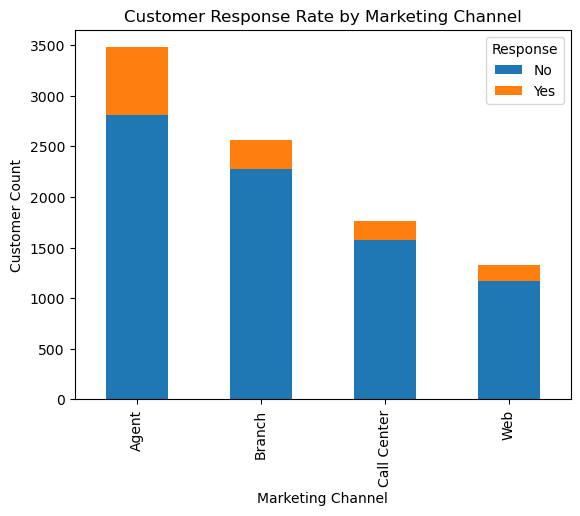

In [61]:
import matplotlib.pyplot as plt

# Group the DataFrame by sales channel and response, and calculate the count of customers
response_by_channel = df.groupby(['sales channel', 'response']).size().unstack()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
response_by_channel.plot(kind='bar', stacked=True)
plt.title('Customer Response Rate by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Customer Count')
plt.legend(title='Response', loc='upper right')
plt.show()


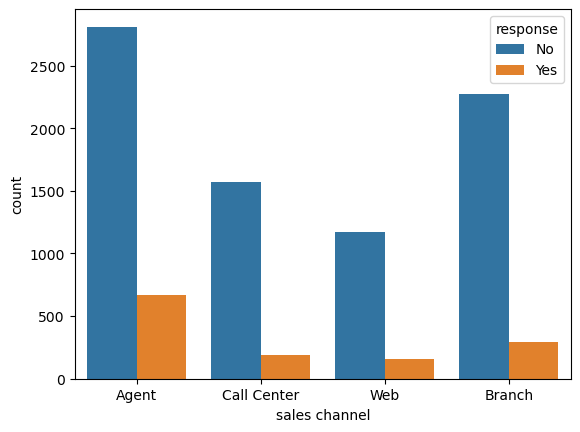

In [62]:
import seaborn as sns


sns.countplot(data=df, x='sales channel', hue='response')
plt.show()
